In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend', ylabel='Profit'>

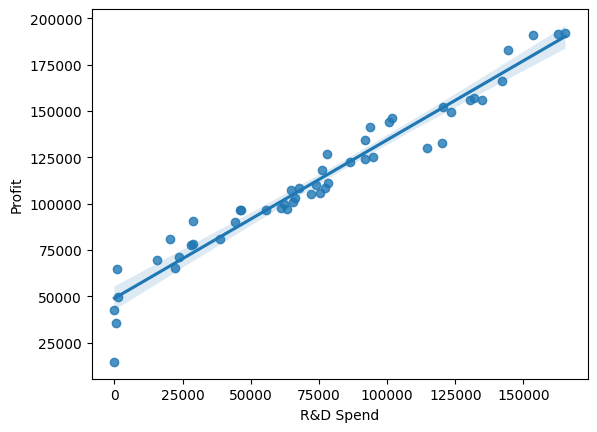

In [13]:
sns.regplot(df,x='R&D Spend', y='Profit')

<Axes: xlabel='Administration', ylabel='Profit'>

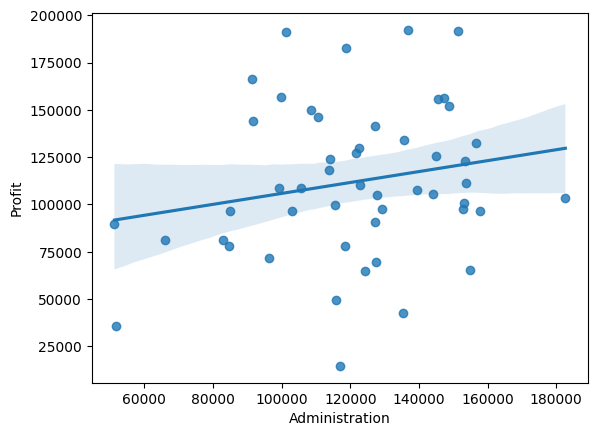

In [14]:
sns.regplot(df,x='Administration', y='Profit')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

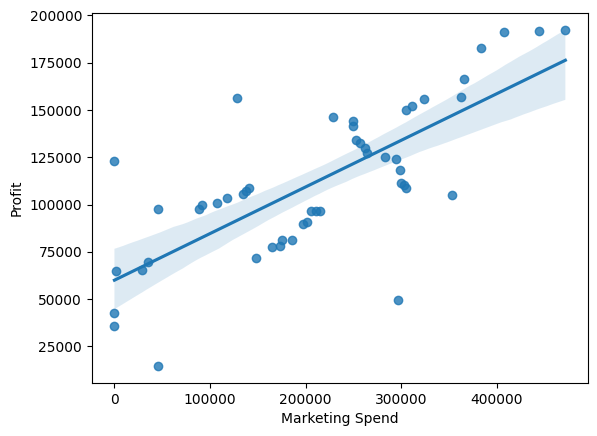

In [15]:
sns.regplot(df,x='Marketing Spend', y='Profit')

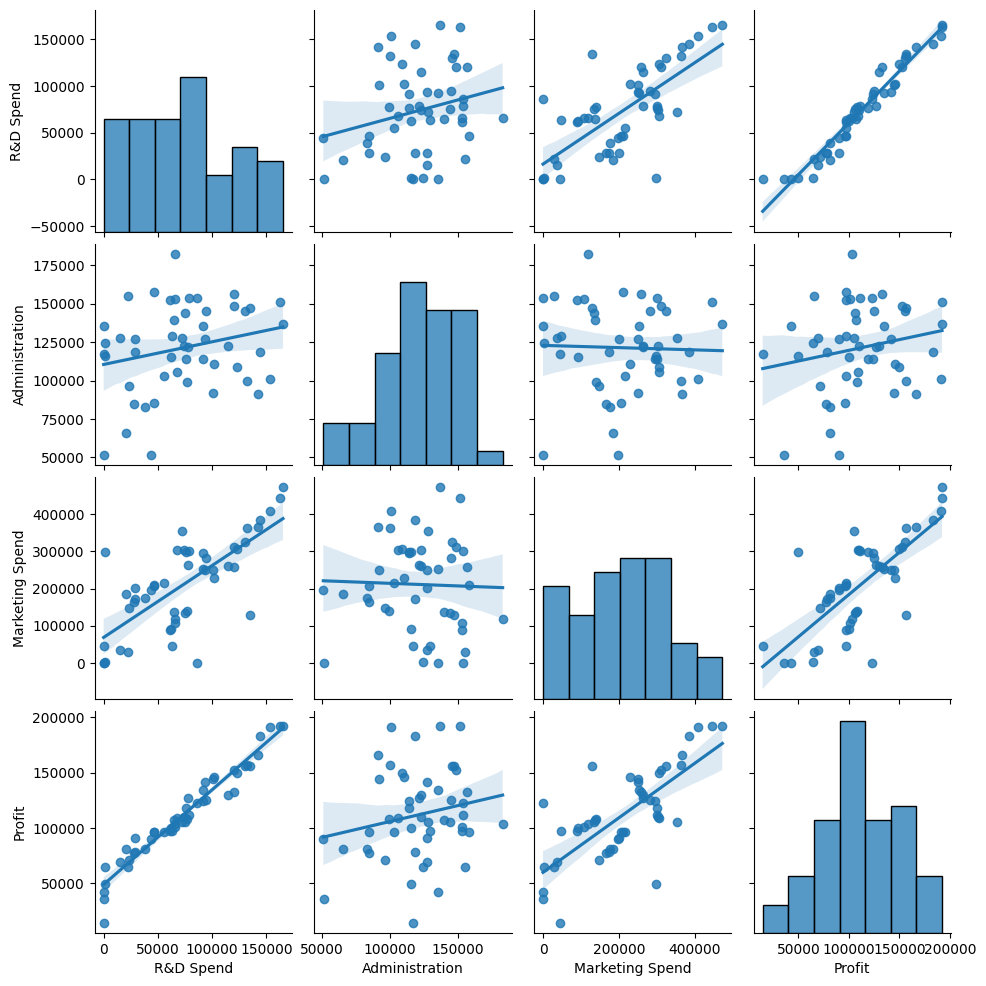

In [16]:
sns.pairplot(df, kind='reg')

<Axes: xlabel='State', ylabel='Profit'>

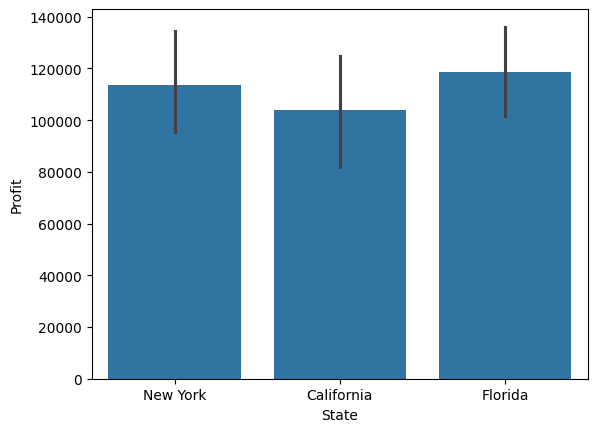

In [17]:
sns.barplot(df, x='State', y='Profit')